In [ ]:
# mamba create -n scverse11 python=3.11
# mamba activate scverse11



# mamba install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia

# mamba install scvi-tools scanpy anndata pandas numpy ipykernel 

# pip install scrublet

In [1]:

import anndata as ad
import pandas as pd
from scipy.sparse import csr_matrix, vstack, hstack, coo_matrix
import numpy as np
from pathlib import Path
import scanpy as sc
import os

from scipy.stats import median_abs_deviation as mad



root_path = Path.home() / "Projects/SingleCell/labelator" 
os.chdir(root_path)
Path.cwd()

from labelator.helper import convert_jakobsson_data_from_tar_10x, convert_to_h5ad

%load_ext autoreload
%autoreload 2


In [2]:

data_path = root_path / "data/scdata/ASAP"

data_path, Path.cwd()


(PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator'))

# team-hafler raw "artifacts" as 10x_h5

In [3]:
h5_path = data_path / "team-hafler/raw/1.0.0"

list(h5_path.glob("*.filtered_feature_bc_matrix.h5"))


[PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG142PD.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG151PD.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG101HC.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/HSDG148PD.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG30HC.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG13HC.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/HSDG199PD.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/S

In [4]:
convert_to_h5ad(h5_path)

skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG142PD.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG151PD.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG101HC.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/HSDG148PD.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG30HC.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/hsDG13HC.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-hafler/raw/1.0.0/HSDG199PD.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-haf

# team-lee raw "artifacts" as 10x_h5

In [20]:
h5_path = data_path / "team-lee/raw/1.0.0"
list(h5_path.glob("*.filtered_feature_bc_matrix.h5"))


[PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_PD_1921.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_PD_1973.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_HC_0602.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/SN_0602_HC.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_PD_1504.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_PD_1858.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/SN_2062_HC.filtered_feature_bc_matrix.h5'),
 PosixPath('/home/ergonyc/Projects/SingleCe

In [21]:
convert_to_h5ad(h5_path)

skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_PD_1921.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_PD_1973.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_HC_0602.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/SN_0602_HC.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_PD_1504.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/HIP_PD_1858.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.0.0/SN_2062_HC.filtered_feature_bc_matrix.h5
skipping /home/ergonyc/Projects/SingleCell/labelator/data/scdata/ASAP/team-lee/raw/1.

## Team Jakobsson from tar.gz of count_matrix folder



In [12]:
!pwd

/home/ergonyc/Projects/SingleCell/labelator


In [23]:
from labelator.util import load_10x_tar_gz

def convert_jakobsson_data_from_tar_10x(data_path: str|Path,
                             filter_features:list|None = None, 
                             remake:bool=False) -> ad.AnnData:
    """
    convert
    
    """

    # get list of tar.gz files in data_path
    # tar_gz_files = [f for f in data_path.iterdir() if f.suffix == ".gz"]
    tar_gz_files = list(data_path.glob('*.tar.gz'))
    for tar_gz in tar_gz_files:

        nm_parts = tar_gz.stem.split('_')
        out_name = f"{nm_parts[0]}_{nm_parts[1]}.h5ad"

        if Path(data_path.parent / out_name).exists() and not remake:
            print(f"skipping {tar_gz}")
        else:


            print(tar_gz)
            # read the data
            adata = load_10x_tar_gz(tar_gz)
            
            adata.var_names_make_unique()
            adata.obs_names_make_unique()

            X = adata.X
            X = csr_matrix(X, dtype=np.uint8)
            adata.X = X

            adata.write_h5ad(data_path.parent / out_name)

In [36]:
dat_path = Path("data/scdata/ASAP/team-jakobsson/raw/cellranger_counts")
dat_path.parent / "cellranger_counts"

PosixPath('data/scdata/ASAP/team-jakobsson/raw/cellranger_counts')

In [26]:
convert_jakobsson_data_from_tar_10x(Path("data/scdata/ASAP/team-jakobsson/raw/cellranger_counts"))

skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP43_AM_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP54_SN_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP16_PFC_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP44_PFC_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP31_AM_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP17_PFC_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP77_PUT_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP33_AM_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP10_PFC_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/ASAP71_PUT_count_matrix.tar.gz
skipping data/scdata/ASAP/team-jakobsson/raw/cellranger_counts/A

## make filter and subset routines

In [27]:


def pp(sample_id):
    adata = sc.read_10x_mtx(sample_id + '/outs/filtered_feature_bc_matrix')
    adata.obs['sample_id'] = sample_id
    
    
    #calculate QC metrics
    adata.var["mt"] = adata.var_names.str.startswith("mt-")
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"],
                               inplace=True, percent_top=[20], log1p=True)
    
    
    #filter outliers
    bool_vector = mad_outlier(adata, 'log1p_total_counts', 5) +\
        mad_outlier(adata, 'log1p_n_genes_by_counts', 5) +\
        mad_outlier(adata, 'pct_counts_in_top_20_genes', 5) +\
        mad_outlier(adata, 'pct_counts_mt', 3)
    
    adata = adata[~bool_vector]
    
    return adata


tar_gz_files = list(data_path.glob('*.tar.gz'))


adatas = [pp(adata) for adata in sample_ids]


adatas = [cook_soup(adata) for adata in adatas]

NameError: name 'sample_ids' is not defined

In [3]:
# QC scores
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")  # "MT-" for human, "Mt-" for mouse
# ribosomal genes
adata.var["rb"] = adata.var_names.str.startswith(("RPS", "RPL"))


# doublet_score

# add metadata
# - batch, batch_id, sample_id, ASAP_sample_id, and team_id
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


In [18]:
h5_path = data_path / "team-lee/raw"

os.chdir(h5_path)
Path.cwd()

data_files = list(Path.cwd().glob("*.h5ad"))

Path.cwd()


PosixPath('/media/ergonyc/DATA/scdata/ASAP/team-lee/raw')

In [21]:
data_files[0].name

'SN_2038_PD_full.h5ad'

In [24]:
from subprocess import run


def run_cellbender(input_files: list[str|Path], 
                   out_dir: str|Path|None = None):
    """
    run cellbender
    """

    if out_dir is None:
        out_dir = input_files[0].parent / "cb_filtered"
        out_dir = Path.cwd() / "cb_filtered"

    if not out_dir.exists():
        out_dir.mkdir(exist_ok=True)


    for input_file in input_files:
        # output_file = out_dir / input_file.stem.replace("_full", "_filtered.h5")
        output_file = input_file.stem.replace("_full", "_filtered.h5")
                
        nepochs = 150
        cellbender_args = ['--input', str(input_file.name),
                        '--output', str(output_file),
                        '--cuda', 
                        '--epochs', str(nepochs)]
        # print(['cellbender', 'remove-background'] + cellbender_args)
        # print(" ".join(['cellbender', 'remove-background'] + cellbender_args))
        run(['cellbender', 'remove-background'] + cellbender_args)



In [25]:
# doesn't work. seems to be because python 3.11 (not supported by cellbender) cannot serialize the checkpints
# TypeError: cannot pickle 'weakref.ReferenceType' object
run_cellbender(data_files)

cellbender:remove-background: Command:
cellbender remove-background --input SN_2038_PD_full.h5ad --output SN_2038_PD_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash e8dc816250)
cellbender:remove-background: 2023-11-17 16:27:46
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_2038_PD_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29334 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 2965
cellbender:remove-background: Prior on counts for empty droplets is 108
cellbender:remove-background: Excluding 9262 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remov

dataset_object.empty_UMI_threshold: 132


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2974.1060
cellbender:remove-background: [epoch 002]  average training loss: 2659.3454  (4.1 seconds per epoch)
cellbender:remove-background: Will checkpoint every 104 epochs
cellbender:remove-background: [epoch 003]  average training loss: 2502.7648
cellbender:remove-background: [epoch 004]  average training loss: 2404.7447
cellbender:remove-background: [epoch 005]  average training loss: 2381.0415
cellbender:remove-background: [epoch 005] average test loss: 2382.2508
cellbender:remove-background: [epoch 006]  average training loss: 2367.6752
cellbender:remove-background: [epoch 007]  average training loss: 2351.0816
cellbender:remove-background: [epoch 008]  average training loss: 2346.8804
cellbender:remove-background: [epoch 009]  average training loss: 2344.5154
cellbender:remove-background: [epoch 010]  average training loss: 2328.9409
cellbender:remove-background: 

remove_background.run.py SN_2038_PD_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_1317_PD_full.h5ad --output SN_1317_PD_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 3176f4222f)
cellbender:remove-background: 2023-11-17 16:37:55
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_1317_PD_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 25767 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 1785
cellbender:remove-background: Prior on counts for empty droplets is 26
cellbender:remove-background: Excluding 9708 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove

dataset_object.empty_UMI_threshold: 36


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 1401.6548
cellbender:remove-background: [epoch 002]  average training loss: 1274.0999  (2.9 seconds per epoch)
cellbender:remove-background: Will checkpoint every 145 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1192.7699
cellbender:remove-background: [epoch 004]  average training loss: 1150.2202
cellbender:remove-background: [epoch 005]  average training loss: 1116.9639
cellbender:remove-background: [epoch 005] average test loss: 1159.3419
cellbender:remove-background: [epoch 006]  average training loss: 1119.9037
cellbender:remove-background: [epoch 007]  average training loss: 1113.4990
cellbender:remove-background: [epoch 008]  average training loss: 1110.6338
cellbender:remove-background: [epoch 009]  average training loss: 1108.7929
cellbender:remove-background: [epoch 010]  average training loss: 1106.2763
cellbender:remove-background: 

remove_background.run.py SN_1317_PD_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_0348_PD_full.h5ad --output SN_0348_PD_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 66ff330399)
cellbender:remove-background: 2023-11-17 16:45:36
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_0348_PD_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28898 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 4938
cellbender:remove-background: Prior on counts for empty droplets is 132
cellbender:remove-background: Excluding 6613 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remov

dataset_object.empty_UMI_threshold: 162


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 3441.6590
cellbender:remove-background: [epoch 002]  average training loss: 3211.2719  (2.3 seconds per epoch)
cellbender:remove-background: Will not checkpoint due to projected run completion in under 7.0 min
cellbender:remove-background: [epoch 003]  average training loss: 3000.0909
cellbender:remove-background: [epoch 004]  average training loss: 2833.0492
cellbender:remove-background: [epoch 005]  average training loss: 2732.4230
cellbender:remove-background: [epoch 005] average test loss: 3061.4549
cellbender:remove-background: [epoch 006]  average training loss: 2680.6917
cellbender:remove-background: [epoch 007]  average training loss: 2609.9302
cellbender:remove-background: [epoch 008]  average training loss: 2571.6626
cellbender:remove-background: [epoch 009]  average training loss: 2585.8800
cellbender:remove-background: [epoch 010]  average training loss: 2590

remove_background.run.py SN_0348_PD_filtered


cellbender:remove-background: Command:
cellbender remove-background --input HIP_PD_1504_full.h5ad --output HIP_PD_1504_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 0f37dd594d)
cellbender:remove-background: 2023-11-17 16:51:22
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from HIP_PD_1504_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28299 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 557
cellbender:remove-background: Prior on counts for empty droplets is 48
cellbender:remove-background: Excluding 8794 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remo

dataset_object.empty_UMI_threshold: 66


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 1408.6333
cellbender:remove-background: [epoch 002]  average training loss: 1281.6916  (7.3 seconds per epoch)
cellbender:remove-background: Will checkpoint every 58 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1172.3806
cellbender:remove-background: [epoch 004]  average training loss: 1131.5436
cellbender:remove-background: [epoch 005]  average training loss: 1120.1602
cellbender:remove-background: [epoch 005] average test loss: 1131.5945
cellbender:remove-background: [epoch 006]  average training loss: 1120.9702
cellbender:remove-background: [epoch 007]  average training loss: 1116.1565
cellbender:remove-background: [epoch 008]  average training loss: 1112.9662
cellbender:remove-background: [epoch 009]  average training loss: 1100.5868
cellbender:remove-background: [epoch 010]  average training loss: 1096.1150
cellbender:remove-background: [

remove_background.run.py HIP_PD_1504_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGPD0413_full.h5ad --output MFGPD0413_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash e4c4386a23)
cellbender:remove-background: 2023-11-17 17:09:31
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGPD0413_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 30137 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 6951
cellbender:remove-background: Prior on counts for empty droplets is 132
cellbender:remove-background: Excluding 8070 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-b

dataset_object.empty_UMI_threshold: 162


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 3350.7959
cellbender:remove-background: [epoch 002]  average training loss: 3004.3837  (4.1 seconds per epoch)
cellbender:remove-background: Will checkpoint every 102 epochs
cellbender:remove-background: [epoch 003]  average training loss: 2534.7522
cellbender:remove-background: [epoch 004]  average training loss: 2317.4908
cellbender:remove-background: [epoch 005]  average training loss: 2255.6007
cellbender:remove-background: [epoch 005] average test loss: 2316.9903
cellbender:remove-background: [epoch 006]  average training loss: 2233.1856
cellbender:remove-background: [epoch 007]  average training loss: 2219.7665
cellbender:remove-background: [epoch 008]  average training loss: 2213.8522
cellbender:remove-background: [epoch 009]  average training loss: 2209.1889
cellbender:remove-background: [epoch 010]  average training loss: 2201.3474
cellbender:remove-background: 

remove_background.run.py MFGPD0413_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGHC2062_full.h5ad --output MFGHC2062_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 41adb94fcb)
cellbender:remove-background: 2023-11-17 17:20:48
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGHC2062_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29562 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 7414
cellbender:remove-background: Prior on counts for empty droplets is 120
cellbender:remove-background: Excluding 8674 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-b

dataset_object.empty_UMI_threshold: 146


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 3063.6343
cellbender:remove-background: [epoch 002]  average training loss: 2702.2913  (3.4 seconds per epoch)
cellbender:remove-background: Will checkpoint every 124 epochs
cellbender:remove-background: [epoch 003]  average training loss: 2472.3753
cellbender:remove-background: [epoch 004]  average training loss: 2352.7973
cellbender:remove-background: [epoch 005]  average training loss: 2277.1580
cellbender:remove-background: [epoch 005] average test loss: 2386.2465
cellbender:remove-background: [epoch 006]  average training loss: 2263.7093
cellbender:remove-background: [epoch 007]  average training loss: 2248.3585
cellbender:remove-background: [epoch 008]  average training loss: 2238.0118
cellbender:remove-background: [epoch 009]  average training loss: 2230.8902
cellbender:remove-background: [epoch 010]  average training loss: 2228.1415
cellbender:remove-background: 

remove_background.run.py MFGHC2062_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGHC2057_full.h5ad --output MFGHC2057_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 35de4fcddd)
cellbender:remove-background: 2023-11-17 17:29:45
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGHC2057_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 27878 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 4888
cellbender:remove-background: Prior on counts for empty droplets is 242
cellbender:remove-background: Excluding 7282 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-b

dataset_object.empty_UMI_threshold: 295


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 8489.3361
cellbender:remove-background: [epoch 002]  average training loss: 7966.4166  (0.5 seconds per epoch)
cellbender:remove-background: Will not checkpoint due to projected run completion in under 7.0 min
cellbender:remove-background: [epoch 003]  average training loss: 8045.5690
cellbender:remove-background: [epoch 004]  average training loss: 7603.9836
cellbender:remove-background: [epoch 005]  average training loss: 7324.9618
cellbender:remove-background: [epoch 005] average test loss: 8162.8241
cellbender:remove-background: [epoch 006]  average training loss: 7032.9038
cellbender:remove-background: [epoch 007]  average training loss: 6784.1833
cellbender:remove-background: [epoch 008]  average training loss: 6542.3277
cellbender:remove-background: [epoch 009]  average training loss: 6181.8046
cellbender:remove-background: [epoch 010]  average training loss: 5805

remove_background.run.py MFGHC2057_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_2057_HC_full.h5ad --output SN_2057_HC_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 639eb63e6c)
cellbender:remove-background: 2023-11-17 17:31:11
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_2057_HC_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 26781 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 1823
cellbender:remove-background: Prior on counts for empty droplets is 44
cellbender:remove-background: Excluding 9103 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove

dataset_object.empty_UMI_threshold: 54


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 1506.3475
cellbender:remove-background: [epoch 002]  average training loss: 1365.6456  (3.4 seconds per epoch)
cellbender:remove-background: Will checkpoint every 122 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1284.5047
cellbender:remove-background: [epoch 004]  average training loss: 1233.7642
cellbender:remove-background: [epoch 005]  average training loss: 1218.9144
cellbender:remove-background: [epoch 005] average test loss: 1237.6060
cellbender:remove-background: [epoch 006]  average training loss: 1217.4689
cellbender:remove-background: [epoch 007]  average training loss: 1216.4695
cellbender:remove-background: [epoch 008]  average training loss: 1212.1138
cellbender:remove-background: [epoch 009]  average training loss: 1213.7993
cellbender:remove-background: [epoch 010]  average training loss: 1207.7825
cellbender:remove-background: 

remove_background.run.py SN_2057_HC_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_2005_PD_full.h5ad --output SN_2005_PD_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 1ac15b65bd)
cellbender:remove-background: 2023-11-17 17:39:59
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_2005_PD_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28084 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 2729
cellbender:remove-background: Prior on counts for empty droplets is 59
cellbender:remove-background: Excluding 9102 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove

dataset_object.empty_UMI_threshold: 80


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 1839.1932
cellbender:remove-background: [epoch 002]  average training loss: 1688.8966  (3.6 seconds per epoch)
cellbender:remove-background: Will checkpoint every 118 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1597.1699
cellbender:remove-background: [epoch 004]  average training loss: 1540.8743
cellbender:remove-background: [epoch 005]  average training loss: 1515.1765
cellbender:remove-background: [epoch 005] average test loss: 1566.3024
cellbender:remove-background: [epoch 006]  average training loss: 1511.5376
cellbender:remove-background: [epoch 007]  average training loss: 1506.5161
cellbender:remove-background: [epoch 008]  average training loss: 1501.6264
cellbender:remove-background: [epoch 009]  average training loss: 1498.2393
cellbender:remove-background: [epoch 010]  average training loss: 1489.8573
cellbender:remove-background: 

remove_background.run.py SN_2005_PD_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_2061_HC_full.h5ad --output SN_2061_HC_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 340c38476f)
cellbender:remove-background: 2023-11-17 17:49:08
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_2061_HC_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29558 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 1631
cellbender:remove-background: Prior on counts for empty droplets is 108
cellbender:remove-background: Excluding 9288 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remov

dataset_object.empty_UMI_threshold: 132


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2342.7618
cellbender:remove-background: [epoch 002]  average training loss: 2131.1520  (4.6 seconds per epoch)
cellbender:remove-background: Will checkpoint every 93 epochs
cellbender:remove-background: [epoch 003]  average training loss: 2034.6577
cellbender:remove-background: [epoch 004]  average training loss: 1979.4585
cellbender:remove-background: [epoch 005]  average training loss: 1967.7429
cellbender:remove-background: [epoch 005] average test loss: 1939.7495
cellbender:remove-background: [epoch 006]  average training loss: 1952.7331
cellbender:remove-background: [epoch 007]  average training loss: 1946.8277
cellbender:remove-background: [epoch 008]  average training loss: 1941.6046
cellbender:remove-background: [epoch 009]  average training loss: 1941.0319
cellbender:remove-background: [epoch 010]  average training loss: 1936.0595
cellbender:remove-background: [

remove_background.run.py SN_2061_HC_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGPD2005_full.h5ad --output MFGPD2005_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash ed52cfbb3e)
cellbender:remove-background: 2023-11-17 18:00:48
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGPD2005_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 30348 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 2215
cellbender:remove-background: Prior on counts for empty droplets is 66
cellbender:remove-background: Excluding 9993 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-ba

dataset_object.empty_UMI_threshold: 107


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2339.3714
cellbender:remove-background: [epoch 002]  average training loss: 2039.4856  (5.6 seconds per epoch)
cellbender:remove-background: Will checkpoint every 75 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1907.5712
cellbender:remove-background: [epoch 004]  average training loss: 1873.7993
cellbender:remove-background: [epoch 005]  average training loss: 1858.4593
cellbender:remove-background: [epoch 005] average test loss: 1860.6941
cellbender:remove-background: [epoch 006]  average training loss: 1847.0240
cellbender:remove-background: [epoch 007]  average training loss: 1842.1989
cellbender:remove-background: [epoch 008]  average training loss: 1841.3784
cellbender:remove-background: [epoch 009]  average training loss: 1832.4592
cellbender:remove-background: [epoch 010]  average training loss: 1830.7898
cellbender:remove-background: [

remove_background.run.py MFGPD2005_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_1858_PD_full.h5ad --output SN_1858_PD_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash c4cceb1e17)
cellbender:remove-background: 2023-11-17 18:15:06
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_1858_PD_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28770 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 1869
cellbender:remove-background: Prior on counts for empty droplets is 72
cellbender:remove-background: Excluding 9490 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove

dataset_object.empty_UMI_threshold: 89


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2178.7771
cellbender:remove-background: [epoch 002]  average training loss: 1994.6627  (3.8 seconds per epoch)
cellbender:remove-background: Will checkpoint every 110 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1893.6949
cellbender:remove-background: [epoch 004]  average training loss: 1838.1952
cellbender:remove-background: [epoch 005]  average training loss: 1822.9618
cellbender:remove-background: [epoch 005] average test loss: 1826.1896
cellbender:remove-background: [epoch 006]  average training loss: 1814.3006
cellbender:remove-background: [epoch 007]  average training loss: 1810.1148
cellbender:remove-background: [epoch 008]  average training loss: 1800.1852
cellbender:remove-background: [epoch 009]  average training loss: 1796.9915
cellbender:remove-background: [epoch 010]  average training loss: 1795.5818
cellbender:remove-background: 

remove_background.run.py SN_1858_PD_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGHC2061_full.h5ad --output MFGHC2061_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 0bf3c23ede)
cellbender:remove-background: 2023-11-17 18:24:54
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGHC2061_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28920 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 3859
cellbender:remove-background: Prior on counts for empty droplets is 80
cellbender:remove-background: Excluding 9049 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-ba

dataset_object.empty_UMI_threshold: 98


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2355.2133
cellbender:remove-background: [epoch 002]  average training loss: 2119.8232  (3.2 seconds per epoch)
cellbender:remove-background: Will checkpoint every 130 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1968.3004
cellbender:remove-background: [epoch 004]  average training loss: 1892.0974
cellbender:remove-background: [epoch 005]  average training loss: 1831.2238
cellbender:remove-background: [epoch 005] average test loss: 1932.4993
cellbender:remove-background: [epoch 006]  average training loss: 1826.1598
cellbender:remove-background: [epoch 007]  average training loss: 1821.9590
cellbender:remove-background: [epoch 008]  average training loss: 1811.9031
cellbender:remove-background: [epoch 009]  average training loss: 1805.8262
cellbender:remove-background: [epoch 010]  average training loss: 1801.9080
cellbender:remove-background: 

remove_background.run.py MFGHC2061_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_1939_HC_full.h5ad --output SN_1939_HC_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 6a7563425e)
cellbender:remove-background: 2023-11-17 18:33:10
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_1939_HC_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28837 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 2386
cellbender:remove-background: Prior on counts for empty droplets is 89
cellbender:remove-background: Excluding 9235 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove

dataset_object.empty_UMI_threshold: 103


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2322.1144
cellbender:remove-background: [epoch 002]  average training loss: 2123.5006  (3.2 seconds per epoch)
cellbender:remove-background: Will checkpoint every 132 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1998.5325
cellbender:remove-background: [epoch 004]  average training loss: 1937.4534
cellbender:remove-background: [epoch 005]  average training loss: 1885.8230
cellbender:remove-background: [epoch 005] average test loss: 1913.1597
cellbender:remove-background: [epoch 006]  average training loss: 1880.5526
cellbender:remove-background: [epoch 007]  average training loss: 1874.6458
cellbender:remove-background: [epoch 008]  average training loss: 1868.5623
cellbender:remove-background: [epoch 009]  average training loss: 1859.7763
cellbender:remove-background: [epoch 010]  average training loss: 1857.6953
cellbender:remove-background: 

remove_background.run.py SN_1939_HC_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGPD1921_full.h5ad --output MFGPD1921_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 86068181b5)
cellbender:remove-background: 2023-11-17 18:41:19
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGPD1921_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 31208 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 3392
cellbender:remove-background: Prior on counts for empty droplets is 108
cellbender:remove-background: Excluding 10485 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-

dataset_object.empty_UMI_threshold: 162


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 3590.1368
cellbender:remove-background: [epoch 002]  average training loss: 3067.7979  (6.4 seconds per epoch)
cellbender:remove-background: Will checkpoint every 66 epochs
cellbender:remove-background: [epoch 003]  average training loss: 2874.5420
cellbender:remove-background: [epoch 004]  average training loss: 2825.4948
cellbender:remove-background: [epoch 005]  average training loss: 2802.9018
cellbender:remove-background: [epoch 005] average test loss: 2803.1311
cellbender:remove-background: [epoch 006]  average training loss: 2792.8333
cellbender:remove-background: [epoch 007]  average training loss: 2787.3021
cellbender:remove-background: [epoch 008]  average training loss: 2779.6540
cellbender:remove-background: [epoch 009]  average training loss: 2776.8280
cellbender:remove-background: [epoch 010]  average training loss: 2770.1363
cellbender:remove-background: [

remove_background.run.py MFGPD1921_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGHC1864_full.h5ad --output MFGHC1864_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 66b3abfc4d)
cellbender:remove-background: 2023-11-17 18:57:37
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGHC1864_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29357 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 7621
cellbender:remove-background: Prior on counts for empty droplets is 399
cellbender:remove-background: Excluding 6695 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-b

dataset_object.empty_UMI_threshold: 487


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 12098.9427
cellbender:remove-background: [epoch 002]  average training loss: 11234.7385  (0.6 seconds per epoch)
cellbender:remove-background: Will not checkpoint due to projected run completion in under 7.0 min
cellbender:remove-background: [epoch 003]  average training loss: 11478.0925
cellbender:remove-background: [epoch 004]  average training loss: 10664.4897
cellbender:remove-background: [epoch 005]  average training loss: 10303.3592
cellbender:remove-background: [epoch 005] average test loss: 11502.6456
cellbender:remove-background: [epoch 006]  average training loss: 9749.1971
cellbender:remove-background: [epoch 007]  average training loss: 9378.3991
cellbender:remove-background: [epoch 008]  average training loss: 8988.3899
cellbender:remove-background: [epoch 009]  average training loss: 8360.6601
cellbender:remove-background: [epoch 010]  average training loss

remove_background.run.py MFGHC1864_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_1225_HC_full.h5ad --output SN_1225_HC_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 798679b33f)
cellbender:remove-background: 2023-11-17 18:59:09
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_1225_HC_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 23506 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 1307
cellbender:remove-background: Prior on counts for empty droplets is 59
cellbender:remove-background: Excluding 8152 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove

dataset_object.empty_UMI_threshold: 76


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2386.4009
cellbender:remove-background: [epoch 002]  average training loss: 2290.9049  (0.6 seconds per epoch)
cellbender:remove-background: Will not checkpoint due to projected run completion in under 7.0 min
cellbender:remove-background: [epoch 003]  average training loss: 2236.3651
cellbender:remove-background: [epoch 004]  average training loss: 2159.6323
cellbender:remove-background: [epoch 005]  average training loss: 2108.1271
cellbender:remove-background: [epoch 005] average test loss: 2450.5965
cellbender:remove-background: [epoch 006]  average training loss: 2057.8375
cellbender:remove-background: [epoch 007]  average training loss: 1988.5267
cellbender:remove-background: [epoch 008]  average training loss: 1926.9735
cellbender:remove-background: [epoch 009]  average training loss: 1852.7173
cellbender:remove-background: [epoch 010]  average training loss: 1834

remove_background.run.py SN_1225_HC_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGPD1317_full.h5ad --output MFGPD1317_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 1b443f902e)
cellbender:remove-background: 2023-11-17 19:00:42
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGPD1317_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29134 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 5295
cellbender:remove-background: Prior on counts for empty droplets is 72
cellbender:remove-background: Excluding 8687 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-ba

dataset_object.empty_UMI_threshold: 89


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2109.1667
cellbender:remove-background: [epoch 002]  average training loss: 1877.9831  (3.7 seconds per epoch)
cellbender:remove-background: Will checkpoint every 115 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1748.1115
cellbender:remove-background: [epoch 004]  average training loss: 1675.5172
cellbender:remove-background: [epoch 005]  average training loss: 1637.1078
cellbender:remove-background: [epoch 005] average test loss: 1756.4358
cellbender:remove-background: [epoch 006]  average training loss: 1634.5207
cellbender:remove-background: [epoch 007]  average training loss: 1623.8102
cellbender:remove-background: [epoch 008]  average training loss: 1623.7856
cellbender:remove-background: [epoch 009]  average training loss: 1617.5604
cellbender:remove-background: [epoch 010]  average training loss: 1613.7406
cellbender:remove-background: 

remove_background.run.py MFGPD1317_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_2058_PD_full.h5ad --output SN_2058_PD_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash c07bf0db39)
cellbender:remove-background: 2023-11-17 19:10:09
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_2058_PD_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29082 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 3463
cellbender:remove-background: Prior on counts for empty droplets is 108
cellbender:remove-background: Excluding 8871 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remov

dataset_object.empty_UMI_threshold: 126


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2476.5638
cellbender:remove-background: [epoch 002]  average training loss: 2231.0787  (3.9 seconds per epoch)
cellbender:remove-background: Will checkpoint every 109 epochs
cellbender:remove-background: [epoch 003]  average training loss: 2098.5543
cellbender:remove-background: [epoch 004]  average training loss: 2019.0490
cellbender:remove-background: [epoch 005]  average training loss: 1994.8465
cellbender:remove-background: [epoch 005] average test loss: 1996.4613
cellbender:remove-background: [epoch 006]  average training loss: 1987.5627
cellbender:remove-background: [epoch 007]  average training loss: 1977.3356
cellbender:remove-background: [epoch 008]  average training loss: 1969.8693
cellbender:remove-background: [epoch 009]  average training loss: 1963.9102
cellbender:remove-background: [epoch 010]  average training loss: 1944.4742
cellbender:remove-background: 

remove_background.run.py SN_2058_PD_filtered


cellbender:remove-background: Command:
cellbender remove-background --input HIP_HC_2067_full.h5ad --output HIP_HC_2067_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 7d6753c124)
cellbender:remove-background: 2023-11-17 19:20:00
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from HIP_HC_2067_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28876 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 1616
cellbender:remove-background: Prior on counts for empty droplets is 198
cellbender:remove-background: Excluding 8232 features that are estimated to have <= 0.1 background counts in cells.
cellbender:re

dataset_object.empty_UMI_threshold: 267


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 3625.3337
cellbender:remove-background: [epoch 002]  average training loss: 3396.0854  (2.1 seconds per epoch)
cellbender:remove-background: Will not checkpoint due to projected run completion in under 7.0 min
cellbender:remove-background: [epoch 003]  average training loss: 3229.1110
cellbender:remove-background: [epoch 004]  average training loss: 3107.6679
cellbender:remove-background: [epoch 005]  average training loss: 2986.2109
cellbender:remove-background: [epoch 005] average test loss: 3073.9404
cellbender:remove-background: [epoch 006]  average training loss: 2898.1980
cellbender:remove-background: [epoch 007]  average training loss: 2773.6912
cellbender:remove-background: [epoch 008]  average training loss: 2669.9888
cellbender:remove-background: [epoch 009]  average training loss: 2644.7806
cellbender:remove-background: [epoch 010]  average training loss: 2639

remove_background.run.py HIP_HC_2067_filtered


cellbender:remove-background: Command:
cellbender remove-background --input HIP_PD_1902_full.h5ad --output HIP_PD_1902_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 9129ff002b)
cellbender:remove-background: 2023-11-17 19:25:26
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from HIP_PD_1902_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29862 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 3084
cellbender:remove-background: Prior on counts for empty droplets is 219
cellbender:remove-background: Excluding 8673 features that are estimated to have <= 0.1 background counts in cells.
cellbender:re

dataset_object.empty_UMI_threshold: 281


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 5231.3841
cellbender:remove-background: [epoch 002]  average training loss: 4624.4043  (3.2 seconds per epoch)
cellbender:remove-background: Will checkpoint every 131 epochs
cellbender:remove-background: [epoch 003]  average training loss: 4205.7375
cellbender:remove-background: [epoch 004]  average training loss: 3976.8326
cellbender:remove-background: [epoch 005]  average training loss: 3772.4439
cellbender:remove-background: [epoch 005] average test loss: 3730.8080
cellbender:remove-background: [epoch 006]  average training loss: 3693.7571
cellbender:remove-background: [epoch 007]  average training loss: 3649.9153
cellbender:remove-background: [epoch 008]  average training loss: 3620.4662
cellbender:remove-background: [epoch 009]  average training loss: 3623.5858
cellbender:remove-background: [epoch 010]  average training loss: 3589.3749
cellbender:remove-background: 

remove_background.run.py HIP_PD_1902_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGHC1939_full.h5ad --output MFGHC1939_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash c11d901aaa)
cellbender:remove-background: 2023-11-17 19:33:40
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGHC1939_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29993 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 7594
cellbender:remove-background: Prior on counts for empty droplets is 132
cellbender:remove-background: Excluding 7799 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-b

dataset_object.empty_UMI_threshold: 162


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 3790.7358
cellbender:remove-background: [epoch 002]  average training loss: 3402.6618  (2.9 seconds per epoch)
cellbender:remove-background: Will checkpoint every 146 epochs
cellbender:remove-background: [epoch 003]  average training loss: 3077.3589
cellbender:remove-background: [epoch 004]  average training loss: 2891.8925
cellbender:remove-background: [epoch 005]  average training loss: 2779.6647
cellbender:remove-background: [epoch 005] average test loss: 2951.8290
cellbender:remove-background: [epoch 006]  average training loss: 2697.3874
cellbender:remove-background: [epoch 007]  average training loss: 2694.2273
cellbender:remove-background: [epoch 008]  average training loss: 2681.5420
cellbender:remove-background: [epoch 009]  average training loss: 2668.8799
cellbender:remove-background: [epoch 010]  average training loss: 2664.6439
cellbender:remove-background: 

remove_background.run.py MFGHC1939_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_1308_HC_full.h5ad --output SN_1308_HC_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash d78c1cd193)
cellbender:remove-background: 2023-11-17 19:41:04
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_1308_HC_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 26888 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 2665
cellbender:remove-background: Prior on counts for empty droplets is 219
cellbender:remove-background: Excluding 6830 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remov

dataset_object.empty_UMI_threshold: 267


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 5164.1186
cellbender:remove-background: [epoch 002]  average training loss: 4983.9553  (0.7 seconds per epoch)
cellbender:remove-background: Will not checkpoint due to projected run completion in under 7.0 min
cellbender:remove-background: [epoch 003]  average training loss: 4854.6310
cellbender:remove-background: [epoch 004]  average training loss: 4689.3714
cellbender:remove-background: [epoch 005]  average training loss: 4582.5410
cellbender:remove-background: [epoch 005] average test loss: 5031.2749
cellbender:remove-background: [epoch 006]  average training loss: 4484.0876
cellbender:remove-background: [epoch 007]  average training loss: 4315.7705
cellbender:remove-background: [epoch 008]  average training loss: 4188.8315
cellbender:remove-background: [epoch 009]  average training loss: 3982.1227
cellbender:remove-background: [epoch 010]  average training loss: 3935

remove_background.run.py SN_1308_HC_filtered


cellbender:remove-background: Command:
cellbender remove-background --input HIP_HC_2057_full.h5ad --output HIP_HC_2057_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash f7f733ac0b)
cellbender:remove-background: 2023-11-17 19:42:55
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from HIP_HC_2057_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 27729 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 1217
cellbender:remove-background: Prior on counts for empty droplets is 66
cellbender:remove-background: Excluding 9227 features that are estimated to have <= 0.1 background counts in cells.
cellbender:rem

dataset_object.empty_UMI_threshold: 80


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 1776.2069
cellbender:remove-background: [epoch 002]  average training loss: 1651.5946  (3.8 seconds per epoch)
cellbender:remove-background: Will checkpoint every 111 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1571.9523
cellbender:remove-background: [epoch 004]  average training loss: 1470.8281
cellbender:remove-background: [epoch 005]  average training loss: 1421.6323
cellbender:remove-background: [epoch 005] average test loss: 1428.3734
cellbender:remove-background: [epoch 006]  average training loss: 1403.6402
cellbender:remove-background: [epoch 007]  average training loss: 1403.9020
cellbender:remove-background: [epoch 008]  average training loss: 1394.8837
cellbender:remove-background: [epoch 009]  average training loss: 1392.6528
cellbender:remove-background: [epoch 010]  average training loss: 1391.8030
cellbender:remove-background: 

remove_background.run.py HIP_HC_2057_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_1344_PD_full.h5ad --output SN_1344_PD_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash c0b7262d24)
cellbender:remove-background: 2023-11-17 19:52:41
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_1344_PD_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28081 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 1159
cellbender:remove-background: Prior on counts for empty droplets is 80
cellbender:remove-background: Excluding 7295 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove

dataset_object.empty_UMI_threshold: 103


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2555.7146
cellbender:remove-background: [epoch 002]  average training loss: 2360.6520  (2.8 seconds per epoch)
cellbender:remove-background: Will not checkpoint due to projected run completion in under 7.0 min
cellbender:remove-background: [epoch 003]  average training loss: 2198.3423
cellbender:remove-background: [epoch 004]  average training loss: 2098.5066
cellbender:remove-background: [epoch 005]  average training loss: 2030.2292
cellbender:remove-background: [epoch 005] average test loss: 2030.3070
cellbender:remove-background: [epoch 006]  average training loss: 1985.3889
cellbender:remove-background: [epoch 007]  average training loss: 1975.7802
cellbender:remove-background: [epoch 008]  average training loss: 1964.9155
cellbender:remove-background: [epoch 009]  average training loss: 1958.2915
cellbender:remove-background: [epoch 010]  average training loss: 1956

remove_background.run.py SN_1344_PD_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_1921_PD_full.h5ad --output SN_1921_PD_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 6bb49e5cad)
cellbender:remove-background: 2023-11-17 19:59:48
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_1921_PD_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28049 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 2864
cellbender:remove-background: Prior on counts for empty droplets is 72
cellbender:remove-background: Excluding 8881 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove

dataset_object.empty_UMI_threshold: 89


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2285.8741
cellbender:remove-background: [epoch 002]  average training loss: 2038.7278  (3.5 seconds per epoch)
cellbender:remove-background: Will checkpoint every 122 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1887.7700
cellbender:remove-background: [epoch 004]  average training loss: 1803.8454
cellbender:remove-background: [epoch 005]  average training loss: 1762.3324
cellbender:remove-background: [epoch 005] average test loss: 1779.9713
cellbender:remove-background: [epoch 006]  average training loss: 1761.2002
cellbender:remove-background: [epoch 007]  average training loss: 1748.7468
cellbender:remove-background: [epoch 008]  average training loss: 1751.8621
cellbender:remove-background: [epoch 009]  average training loss: 1744.8777
cellbender:remove-background: [epoch 010]  average training loss: 1738.1961
cellbender:remove-background: 

remove_background.run.py SN_1921_PD_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGPD1858_full.h5ad --output MFGPD1858_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash 222499215a)
cellbender:remove-background: 2023-11-17 20:08:40
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGPD1858_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29277 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 4885
cellbender:remove-background: Prior on counts for empty droplets is 72
cellbender:remove-background: Excluding 9364 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-ba

dataset_object.empty_UMI_threshold: 93


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2106.2007
cellbender:remove-background: [epoch 002]  average training loss: 1879.2871  (3.8 seconds per epoch)
cellbender:remove-background: Will checkpoint every 112 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1749.5406
cellbender:remove-background: [epoch 004]  average training loss: 1676.1531
cellbender:remove-background: [epoch 005]  average training loss: 1652.0392
cellbender:remove-background: [epoch 005] average test loss: 1749.4911
cellbender:remove-background: [epoch 006]  average training loss: 1648.6018
cellbender:remove-background: [epoch 007]  average training loss: 1636.6848
cellbender:remove-background: [epoch 008]  average training loss: 1631.5678
cellbender:remove-background: [epoch 009]  average training loss: 1631.5234
cellbender:remove-background: [epoch 010]  average training loss: 1626.4049
cellbender:remove-background: 

remove_background.run.py MFGPD1858_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_1864_HC_full.h5ad --output SN_1864_HC_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash f337c480e8)
cellbender:remove-background: 2023-11-17 20:18:20
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_1864_HC_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 28336 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 1619
cellbender:remove-background: Prior on counts for empty droplets is 36
cellbender:remove-background: Excluding 9197 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove

dataset_object.empty_UMI_threshold: 52


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 1654.1422
cellbender:remove-background: [epoch 002]  average training loss: 1456.8673  (5.0 seconds per epoch)
cellbender:remove-background: Will checkpoint every 85 epochs
cellbender:remove-background: [epoch 003]  average training loss: 1367.0552
cellbender:remove-background: [epoch 004]  average training loss: 1331.5133
cellbender:remove-background: [epoch 005]  average training loss: 1318.5296
cellbender:remove-background: [epoch 005] average test loss: 1324.2349
cellbender:remove-background: [epoch 006]  average training loss: 1314.1866
cellbender:remove-background: [epoch 007]  average training loss: 1308.6793
cellbender:remove-background: [epoch 008]  average training loss: 1308.8470
cellbender:remove-background: [epoch 009]  average training loss: 1302.6143
cellbender:remove-background: [epoch 010]  average training loss: 1300.1997
cellbender:remove-background: [

remove_background.run.py SN_1864_HC_filtered


cellbender:remove-background: Command:
cellbender remove-background --input SN_0009_PD_full.h5ad --output SN_0009_PD_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash d7a860c278)
cellbender:remove-background: 2023-11-17 20:30:58
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from SN_0009_PD_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29277 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 3105
cellbender:remove-background: Prior on counts for empty droplets is 108
cellbender:remove-background: Excluding 9232 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remov

dataset_object.empty_UMI_threshold: 126


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2866.6625
cellbender:remove-background: [epoch 002]  average training loss: 2573.4784  (3.8 seconds per epoch)
cellbender:remove-background: Will checkpoint every 112 epochs
cellbender:remove-background: [epoch 003]  average training loss: 2417.5148
cellbender:remove-background: [epoch 004]  average training loss: 2319.1069
cellbender:remove-background: [epoch 005]  average training loss: 2289.0637
cellbender:remove-background: [epoch 005] average test loss: 2304.9854
cellbender:remove-background: [epoch 006]  average training loss: 2276.4269
cellbender:remove-background: [epoch 007]  average training loss: 2263.8652
cellbender:remove-background: [epoch 008]  average training loss: 2257.9593
cellbender:remove-background: [epoch 009]  average training loss: 2252.5509
cellbender:remove-background: [epoch 010]  average training loss: 2248.2895
cellbender:remove-background: 

remove_background.run.py SN_0009_PD_filtered


cellbender:remove-background: Command:
cellbender remove-background --input MFGHC2067_full.h5ad --output MFGHC2067_filtered.h5 --cuda --epochs 150
cellbender:remove-background: CellBender 0.3.1
cellbender:remove-background: (Workflow hash ba845fd3a5)
cellbender:remove-background: 2023-11-17 20:40:33
cellbender:remove-background: Running remove-background
cellbender:remove-background: Loading data from MFGHC2067_full.h5ad
cellbender:remove-background: AnnData format
cellbender:remove-background: Using `.X` for count data.
cellbender:remove-background: Features in dataset: 36601 Gene Expression
cellbender:remove-background: Trimming features for inference.
cellbender:remove-background: 29977 features have nonzero counts.
cellbender:remove-background: Prior on counts for cells is 3887
cellbender:remove-background: Prior on counts for empty droplets is 89
cellbender:remove-background: Excluding 9466 features that are estimated to have <= 0.1 background counts in cells.
cellbender:remove-ba

dataset_object.empty_UMI_threshold: 114


cellbender:remove-background: Running inference...
cellbender:remove-background: [epoch 001]  average training loss: 2811.1825
cellbender:remove-background: [epoch 002]  average training loss: 2470.7090  (3.9 seconds per epoch)
cellbender:remove-background: Will checkpoint every 109 epochs
cellbender:remove-background: [epoch 003]  average training loss: 2280.6532
cellbender:remove-background: [epoch 004]  average training loss: 2164.3915
cellbender:remove-background: [epoch 005]  average training loss: 2130.4561
cellbender:remove-background: [epoch 005] average test loss: 2145.5144
cellbender:remove-background: [epoch 006]  average training loss: 2121.3123
cellbender:remove-background: [epoch 007]  average training loss: 2109.2454
cellbender:remove-background: [epoch 008]  average training loss: 2101.9098
cellbender:remove-background: [epoch 009]  average training loss: 2103.3577
cellbender:remove-background: [epoch 010]  average training loss: 2097.2922
cellbender:remove-background: 

KeyboardInterrupt: 

In [29]:
import torch._C

torch._C._cuda_getDeviceCount()

0

In [ ]:
# filter & subset 

# - "subset " to pct mt,rb <50% and nGene > 500 nCell > 500?)


## QC

In [ ]:
## QC

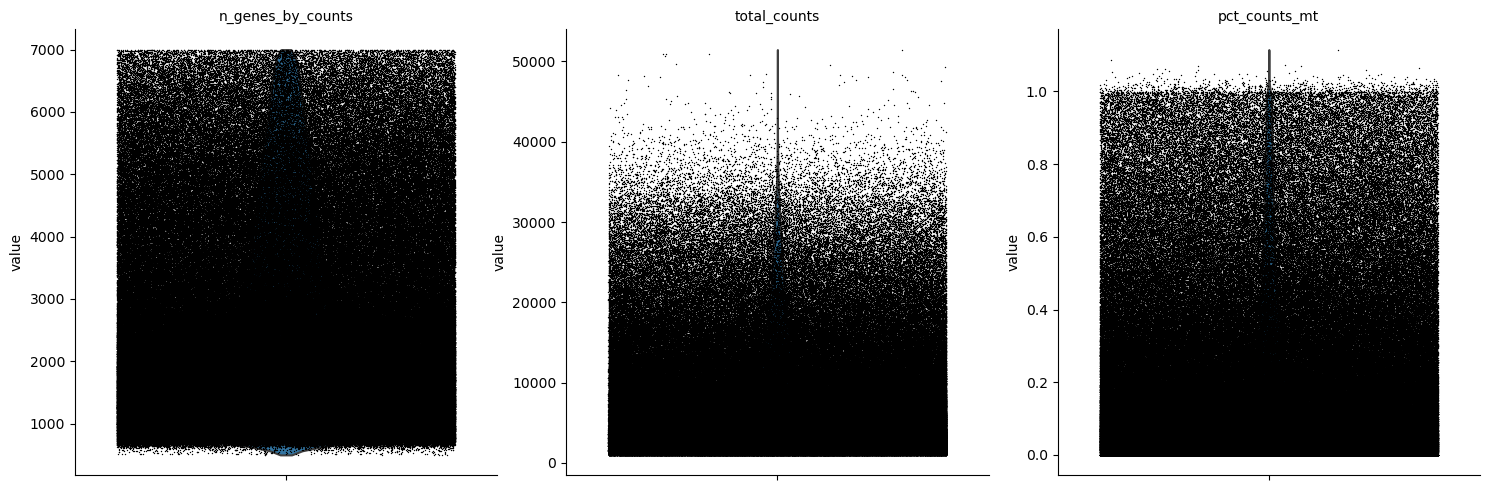

In [9]:


sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "rb"], inplace=True, log1p=True)
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True, save="_qc_violin.png")


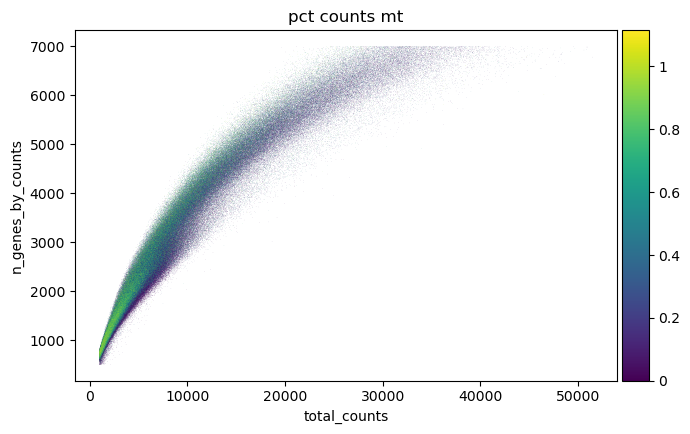

In [10]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [11]:
# sc.pp.filter_cells(adata, min_genes=100)
# sc.pp.filter_genes(adata, min_cells=3)

### Doublet detection

As a next step, we run a doublet detection algorithm. Identifying doublets is crucial as they can lead to misclassifications or distortions in downstream analysis steps. Scanpy contains the doublet detection method Scrublet {cite}`Wolock2019`. Scrublet predicts cell doublets using a nearest-neighbor classifier of observed transcriptomes and simulated doublets. {func}`scanpy.external.pp.scrublet` adds `doublet_score` and `predicted_doublet` to `.obs`. One can now either filter directly on `predicted_doublet` or use the `doublet_score` later during clustering to filter clusters with high doublet scores. 

In [10]:
# sc.external.pp.scrublet(adata, batch_key="sample")

## Normalization

The next preprocessing step is normalization. A common approach is count depth scaling with subsequent log plus one (log1p) transformation. Count depth scaling normalizes the data to a “size factor” such as the median count depth in the dataset, ten thousand (CP10k) or one million (CPM, counts per million). The size factor for count depth scaling can be controlled via `target_sum` in `pp.normalize_total`. We are applying median count depth normalization with log1p transformation (AKA log1PF).

In [13]:
# Saving count data
adata.layers["counts"] = adata.X.copy()


In [14]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data:

sc.pp.log1p(adata)

In [24]:
obs.head()

seurat_clusters         cell_type        sample
cells                                                                
GGCCTAATCGATTTAG-1_1               11    Mature neurons  KEN-1070-ARC
TAGTAACGTAGTCAAT-1_1                5    Mature neurons  KEN-1070-ARC
GAAAGCCAGCAGCTCA-1_1                2  Oligodendrocytes  KEN-1070-ARC
ACTCACCTCCTCCCTC-1_1                5    Mature neurons  KEN-1070-ARC
CTTCATCCAATCGCAC-1_1               11    Mature neurons  KEN-1070-ARC

In [22]:


clean_samples_path = Path.cwd() / "data" / "Model Combinations - clean_samples_138.csv"
clean_samples = pd.read_csv(clean_samples_path)
clean_samples.head()



sample   batch
0  KEN-1070-ARC  batch1
1  KEN-1092-ARC  batch1
2  KEN-1095-ARC  batch1
3  KEN-1127-ARC  batch1
4  KEN-1132-ARC  batch1

In [27]:
adata

AnnData object with n_obs × n_vars = 713626 × 36601
    obs: 'seurat_clusters', 'cell_type', 'sample', 'cell_ids', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch'
    var: 'gene_ids', 'big_idx', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet', 'log1p'
    layers: 'counts'

In [26]:

batch_mapper = dict(zip(clean_samples["sample"], clean_samples["batch"]))
adata.obs["batch"] = adata.obs["sample"].map(batch_mapper)

## Feature selection

As a next step, we want to reduce the dimensionality of the dataset and only include the most informative genes. This step is commonly known as feature selection. The scanpy function `pp.highly_variable_genes` annotates highly variable genes by reproducing the implementations of Seurat {cite}`Satija2015`, Cell Ranger {cite}`Zheng2017`, and Seurat v3 {cite}`stuart2019comprehensive` depending on the chosen `flavor`. 

In [28]:
# sc.pp.highly_variable_genes(adata, n_top_genes=3000, batch_key="sample")
adata.raw = adata  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=3000,
    layer="counts",
    batch_key="batch",
    subset=True,
)


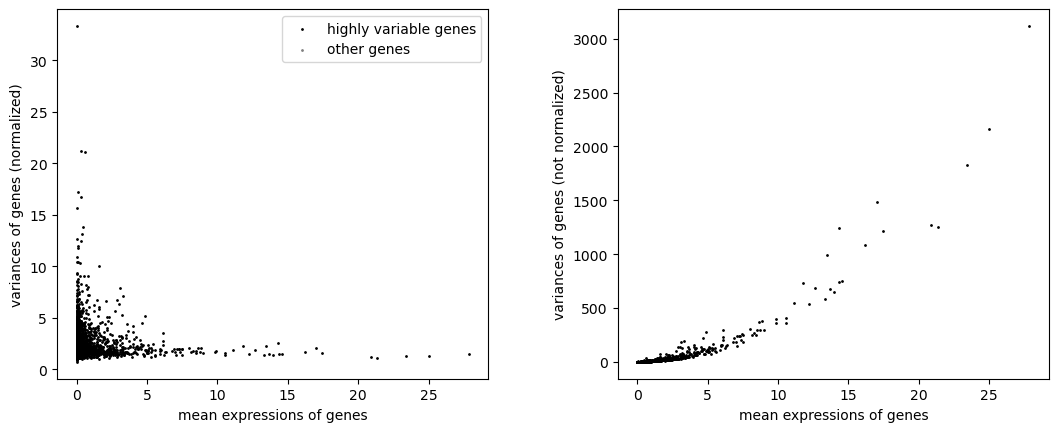

In [29]:
sc.pl.highly_variable_genes(adata)

## Dimensionality Reduction
Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

In [30]:
sc.tl.pca(adata)

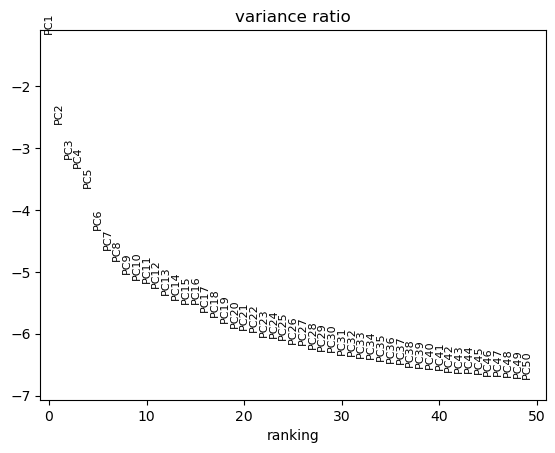

In [31]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [32]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)


/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/si

## Clustering

As with Seurat and many other frameworks, we recommend the Leiden graph-clustering method (community detection based on optimizing modularity) {cite}`traag2019louvain`. Note that Leiden clustering directly clusters the neighborhood graph of cells, which we already computed in the previous section.

/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


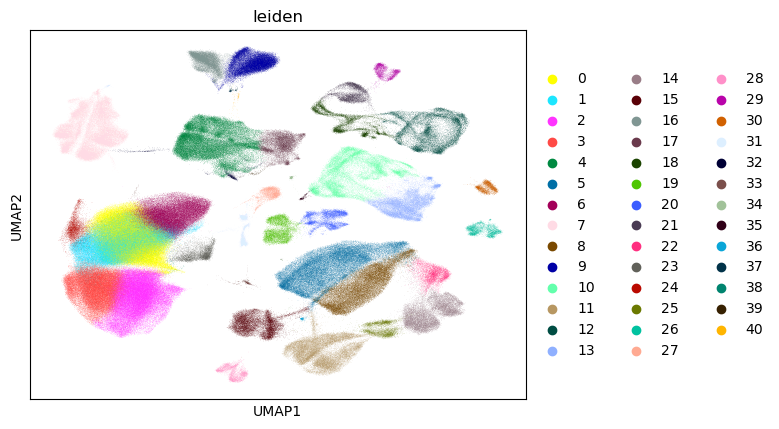

In [33]:

sc.tl.leiden(adata)
sc.pl.umap(adata, color=["leiden"])


## Re-assess quality control and cell filtering 

As indicated before, we will now re-assess our filtering strategy by visualizing different QC metrics using UMAP. 

In [34]:
adata.obs["predicted_doublet"] = adata.obs["predicted_doublet"].astype("category")


/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


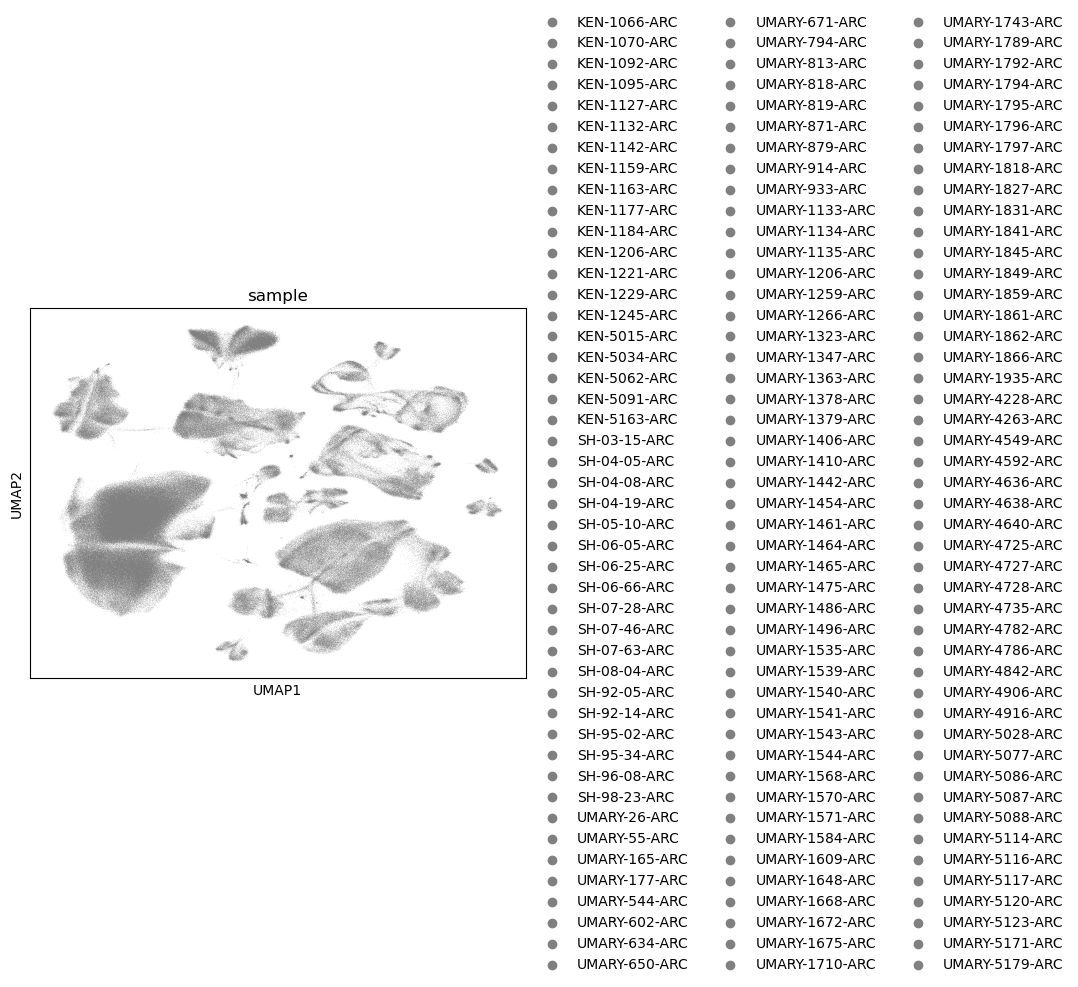

In [35]:
sc.pl.umap(adata, color="sample")


/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


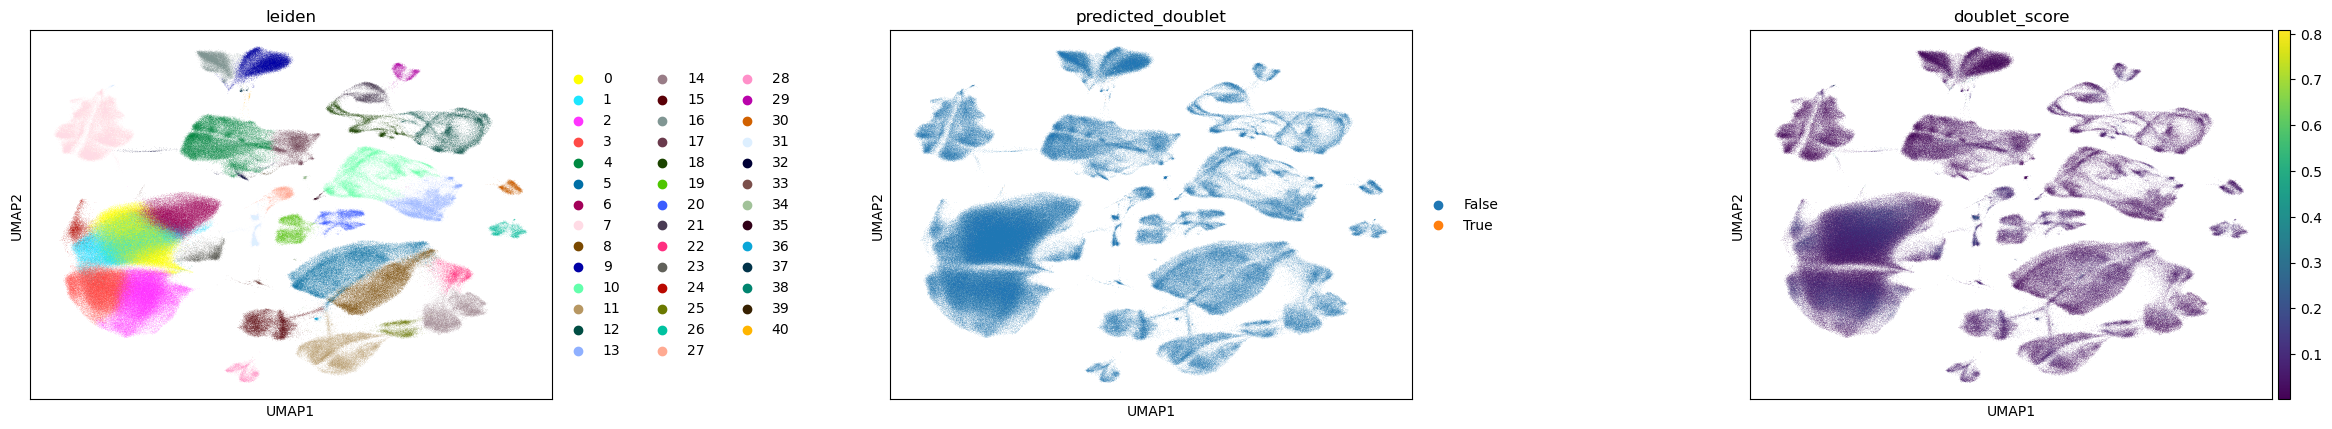

In [36]:

sc.pl.umap(
    adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
)

/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


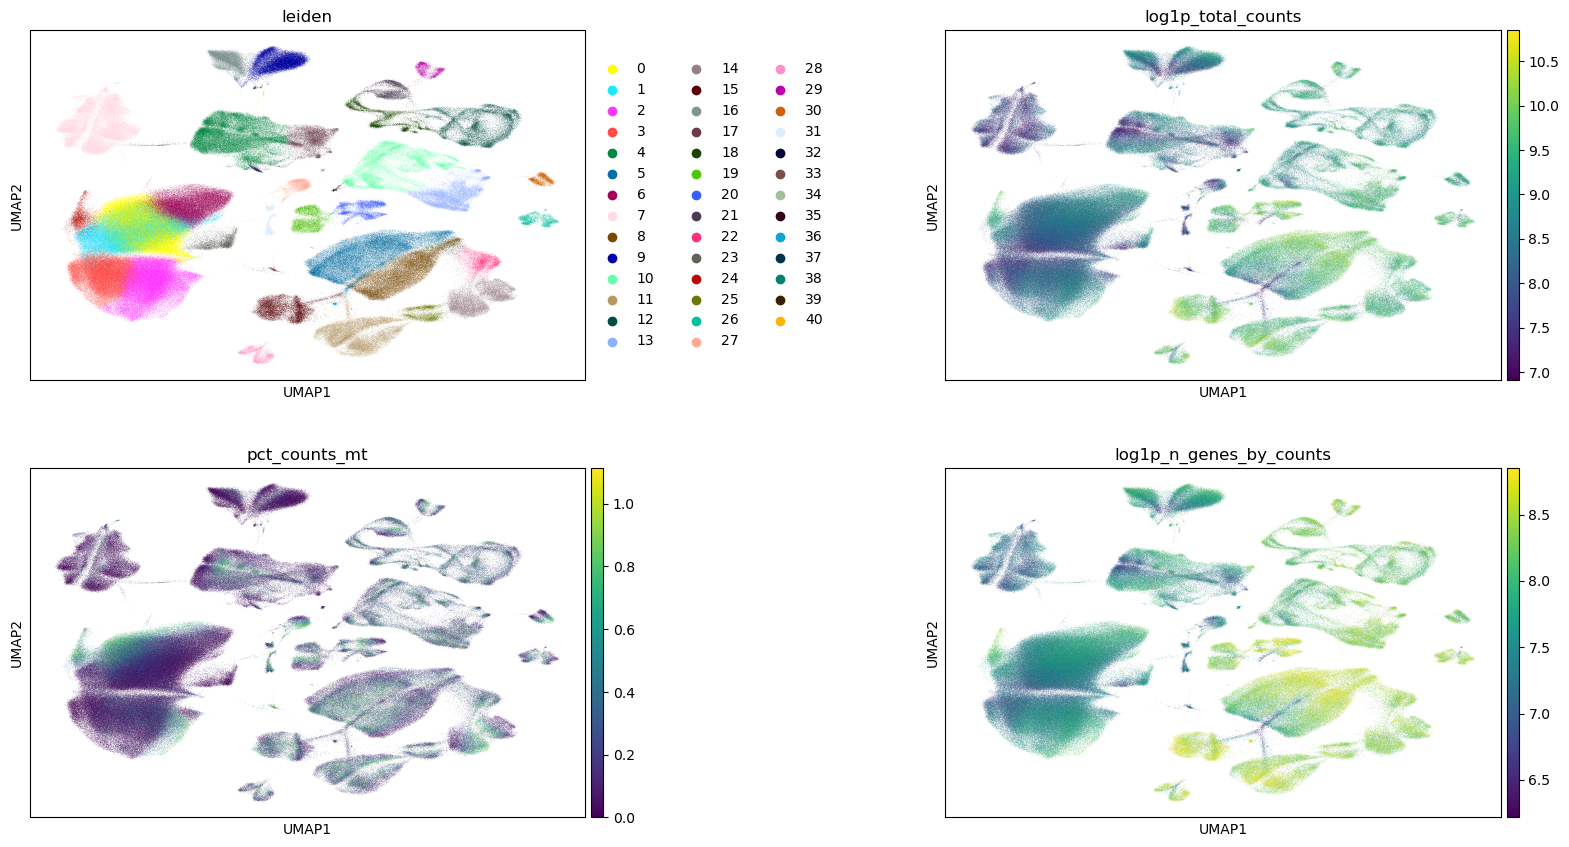

In [37]:
adata_ = adata[adata.obs["predicted_doublet"] == False].copy()
sc.pl.umap(
    adata_, color=["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"], wspace=0.5, ncols=2
)

/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


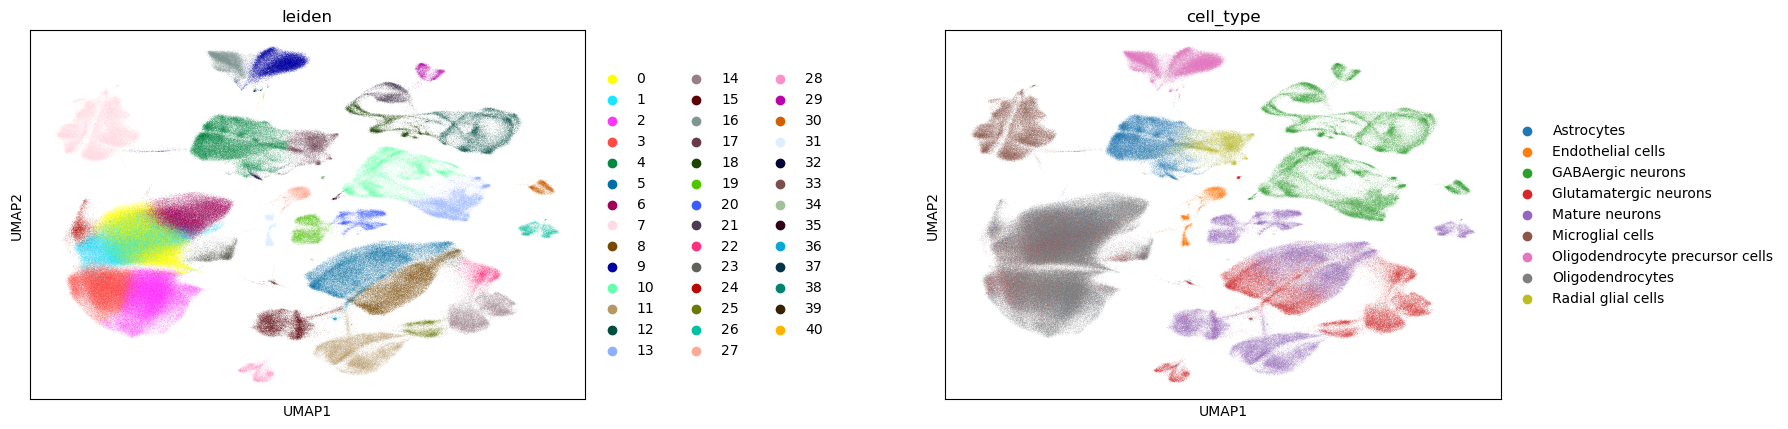

In [38]:
sc.pl.umap(
    adata_, color=["leiden", "cell_type"], wspace=0.5, ncols=2
)

/Users/ergonyc/miniforge3/envs/scverse10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


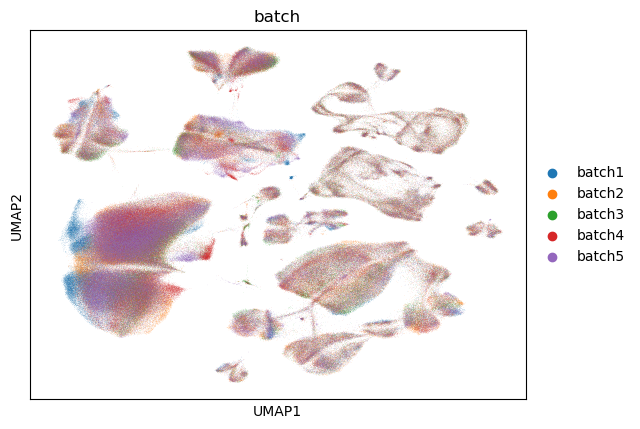

In [52]:
sc.pl.umap(
    adata_, color=["batch"], wspace=0.5, ncols=2
)

In [39]:
adata_

AnnData object with n_obs × n_vars = 713260 × 3000
    obs: 'seurat_clusters', 'cell_type', 'sample', 'cell_ids', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden'
    var: 'gene_ids', 'big_idx', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'sample_colors', 'predicted_doublet_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    la

In [40]:
adata2 = ad.read_h5ad("/Users/ergonyc/Projects/SingleCell/labelator/data/brain_atlas_anndata.h5ad")
adata2.var_names_make_unique()
features = adata2.var_names.tolist()


In [41]:

del adata2

In [42]:
high_var = adata_.var_names[adata.var.highly_variable].tolist()
adata_.var['high_var'] = [int(x) for x in adata.var.highly_variable ] 

In [43]:
len(high_var)

3000

In [44]:
len(features)

3000

In [45]:
len(set(high_var) - set(features))

1542

In [46]:
len(set(features) - set(high_var) )

1542

In [47]:
adata_.var.highly_variable

PRDM16        True
AL365255.1    True
ERRFI1        True
SLC2A5        True
MIR34AHG      True
              ... 
MT-CO3        True
MT-ND3        True
MT-ND4L       True
MT-ND4        True
MT-CYB        True
Name: highly_variable, Length: 3000, dtype: bool

In [48]:
adata_.var.columns == 'highly_variable'

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False])

In [49]:
adata_

AnnData object with n_obs × n_vars = 713260 × 3000
    obs: 'seurat_clusters', 'cell_type', 'sample', 'cell_ids', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden'
    var: 'gene_ids', 'big_idx', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'high_var'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'sample_colors', 'predicted_doublet_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 

In [50]:
from scipy.stats import median_abs_deviation

def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier


adata_.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata, "pct_counts_in_top_50_genes", 5)
)
adata_.obs.outlier.value_counts()

outlier
False    713260
Name: count, dtype: int64

In [51]:
adata_.write_h5ad("./data/adata_.h5ad")